In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy
from keras.datasets import mnist
from sklearn import metrics

Using TensorFlow backend.
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mcd0029/anaconda3/lib/python3.7/site-packages/t

In [2]:
# Load Dataset 
(trainX, trainY), (testX, testY) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


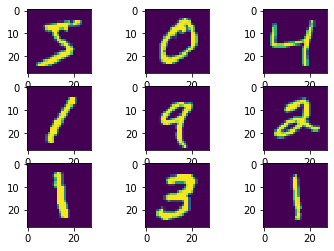

In [3]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# Plot first few images
for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(trainX[i])
# Show the figure
plt.show()

In [4]:
# Normalize
trainX = trainX.astype('float32') / 255.
testX = testX.astype('float32') / 255.
# Flatten images
trainX = trainX.reshape((len(trainX), np.prod(trainX.shape[1:])))
testX = testX.reshape((len(testX), np.prod(testX.shape[1:])))

In [5]:
UNITS = [5, 10, 30, 60]

In [6]:
def autoencoder(encoding_dim):
    ''' Function to create autoencoder, train it, predict test data and display results '''
    
    # Layer 1: Input shape 
    input_img = keras.Input(shape=(784,))
    # Layer 2: Encode
    layer2 = layers.Dense(encoding_dim, activation='relu')
    encoded = layer2(input_img)
    # Layer 3: Decode
    decoded = layers.Dense(784, activation='sigmoid')(encoded)
    
    # Create two models
    autoencoder = keras.Model(input_img, decoded)
    
    # Compile model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Train model
    autoencoder.fit(trainX, trainX,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    shuffle=True,
                    validation_data=(testX, testX))
    
    decoded_imgs = autoencoder.predict(testX)

    # Display results
    n = 10  
    fig = plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(testX[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(f'Original picture (first row) vs. Reconstruction for {encoding_dim} hidden units', fontsize=20)
    plt.show()
    
    return layer2

## Question 1: Display reconstruction performance

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



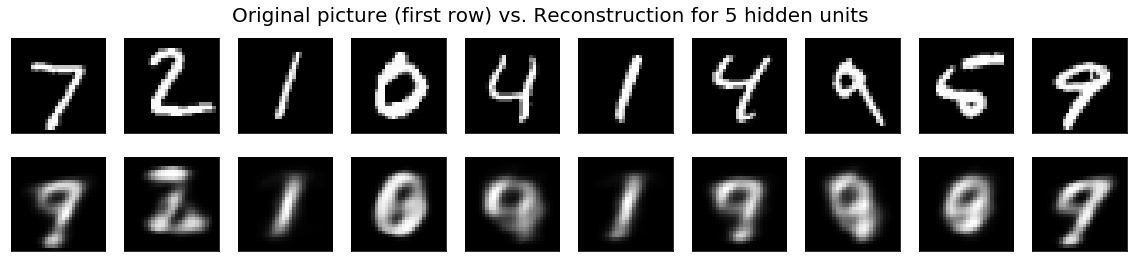

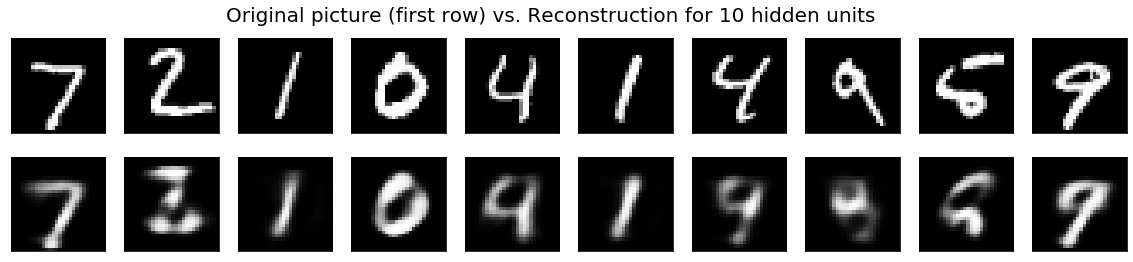

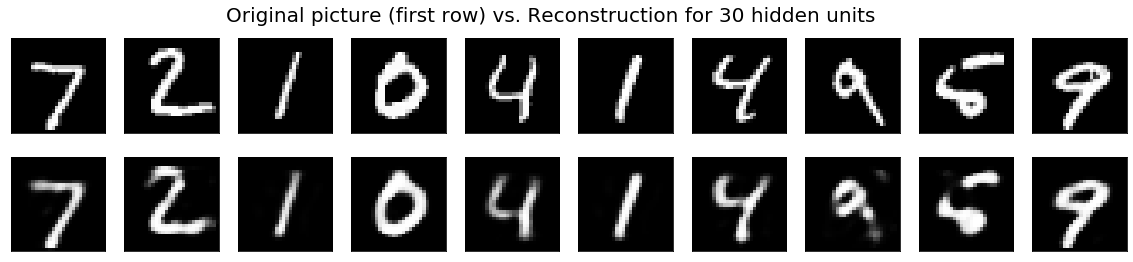

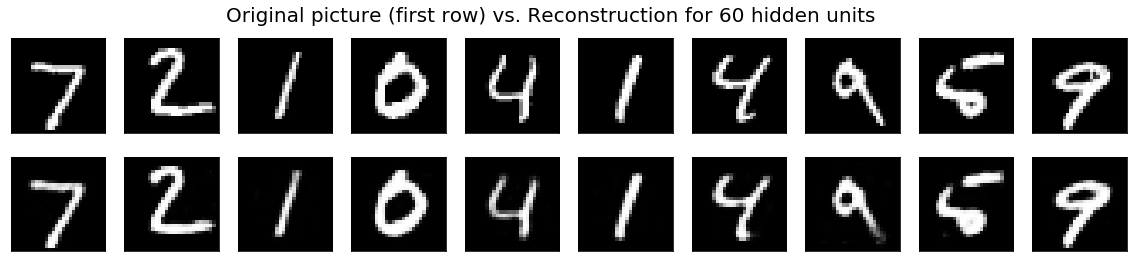

In [7]:
save_for_weights = []
for i in UNITS:
    save_for_weights.append(autoencoder(i))

## Question 2: Display set of weights

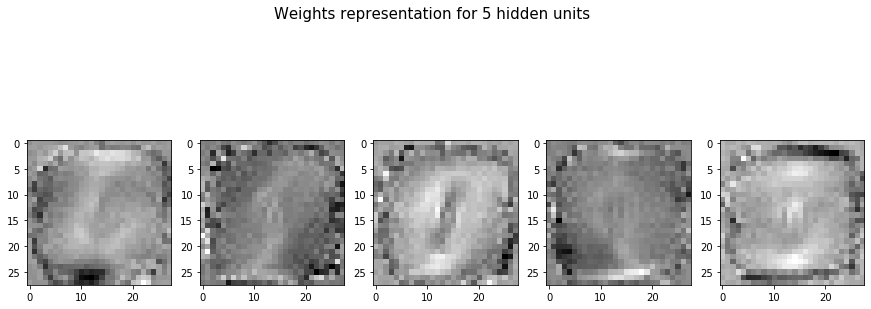

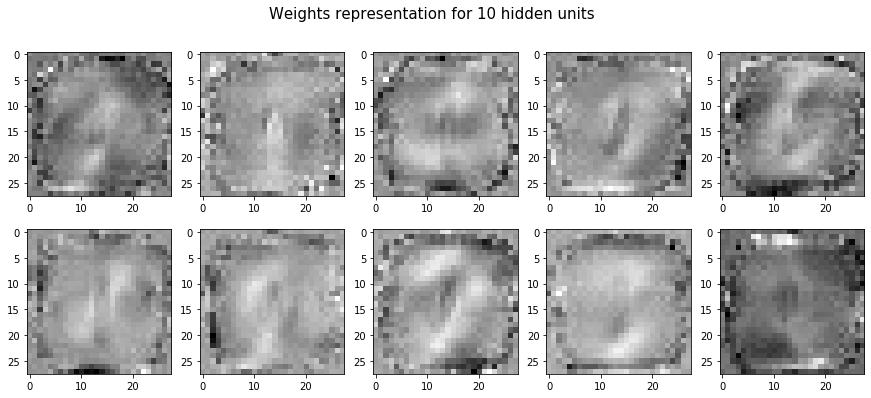

In [8]:
for i in range(2):
    
    weights = save_for_weights[i].get_weights()
    weights = np.array(weights[0])    

    fig=plt.figure(figsize=(15,6))

    if i==0:
        for j in range(5):
            col = weights.T[j]
            ax=plt.subplot(1, 5, j+1)
            plt.imshow(col.reshape(28,28))
            plt.suptitle("Weights representation for 5 hidden units", fontsize=15)
        
    if i==1:
        for j in range(10):
            col = weights.T[j]
            ax=plt.subplot(2, 5, j+1)
            plt.imshow(col.reshape(28,28))
            plt.suptitle("Weights representation for 10 hidden units", fontsize=15)

## Question 3: Train classifier

In [9]:
# One-hot encode
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [10]:
def classifier(encoding_dim):
    # Layer 1: Input shape 
    input_img = keras.Input(shape=(784,))
    # Layer 2: Encode
    layer2 = layers.Dense(encoding_dim, activation='relu')
    encoded = layer2(input_img)
    # Classification Layer
    classification = layers.Dense(10, activation='softmax')(encoded)
    
    # Create model
    model = keras.Model(input_img, classification)
    model.compile(loss=CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy', CategoricalCrossentropy()])
    
    history = model.fit(trainX, trainY, shuffle = True, validation_data=(testX, testY), epochs = 50, batch_size = 32, verbose = 0)
    predictions = model.predict(testX)
    score = model.evaluate(testX, testY, verbose=0)
    
    return history, score, predictions

In [11]:
results = []
score = []
predictions = []
for i in UNITS:
    h, s, p = classifier(i)
    results.append(h)
    score.append(s)
    predictions.append(p)

Text(0.5, 1.0, 'Training accuracy')

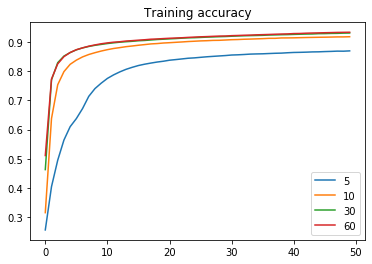

In [12]:
for i in range(len(UNITS)):
    plt.plot(results[i].history['accuracy'], label=UNITS[i])
plt.legend(loc='lower right')
plt.title('Training accuracy')

Text(0.5, 1.0, 'Training loss')

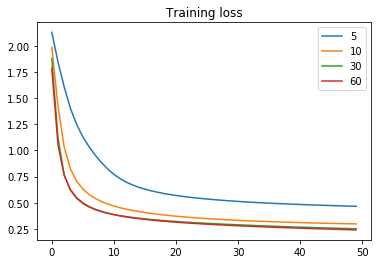

In [13]:
for i in range(len(UNITS)):
    plt.plot(results[i].history['loss'], label=UNITS[i])
plt.legend(loc='upper right')
plt.title('Training loss')

Text(0.5, 1.0, 'Overall accuracy vs. number of hidden layers')

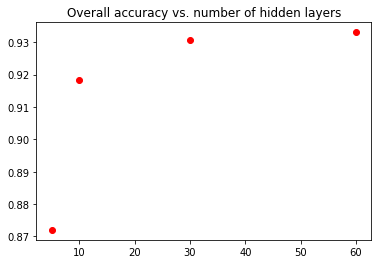

In [14]:
for i in range(len(UNITS)):
    plt.plot(UNITS[i], score[i][1], 'ro')
plt.title("Overall accuracy vs. number of hidden layers")    

Text(0.5, 1.0, 'Overall loss vs. number of hidden layers')

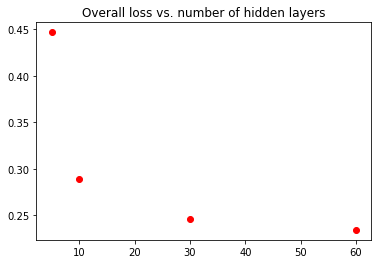

In [15]:
for i in range(len(UNITS)):
    plt.plot(UNITS[i], score[i][0], 'ro')
plt.title("Overall loss vs. number of hidden layers")    

## Question 4: Confusion matrices

In [16]:
for i in range(len(UNITS)):
    pred = (predictions[i]> 0.5)
    matrix = metrics.confusion_matrix(testY.argmax(axis=1), pred.argmax(axis=1))
    print(f'Confusion matrix for {UNITS[i]} hidden layers')
    print(matrix)

Confusion matrix for 5 hidden layers
[[ 954    0    5    1    0   11    8    1    0    0]
 [  57 1060   15    2    0    0    0    0    1    0]
 [  78   13  874    8    7    1   24    5   20    2]
 [  91    4   15  814    1   37    0    9   34    5]
 [  77    3    1    0  837    0   16    2    3   43]
 [ 165    2    8   55    8  619   11    4   19    1]
 [  64    2   13    0   11    9  856    0    3    0]
 [  86   21   15    3    7    0    0  852    2   42]
 [ 148    1   16   27   19   27    8    3  701   24]
 [  92    1    2    5   52   10    0   33    5  809]]
Confusion matrix for 10 hidden layers
[[ 961    0    1    1    0    4    8    3    2    0]
 [  16 1104    2    2    0    0    3    1    7    0]
 [  58    5  903   12   10    0   10    9   22    3]
 [  54    0   15  890    0   21    1    9   15    5]
 [  38    0    3    0  892    0    8    2    4   35]
 [  80    1    4   32    3  736    6    4   21    5]
 [  30    2    5    0   14   11  892    3    1    0]
 [  30    6   22    3  

## Question 5: Comparison with older homeworks

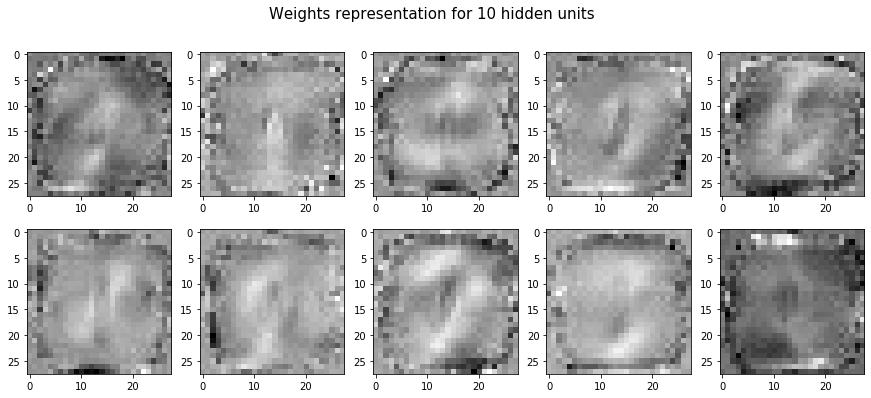

In [11]:
weights = save_for_weights[1].get_weights()
weights = np.array(weights[0])    
plt.figure(figsize=(15,6))
for j in range(10):
    col = weights.T[j]
    ax=plt.subplot(2, 5, j+1)
    plt.imshow(col.reshape(28,28))
    plt.suptitle("Weights representation for 10 hidden units", fontsize=15)

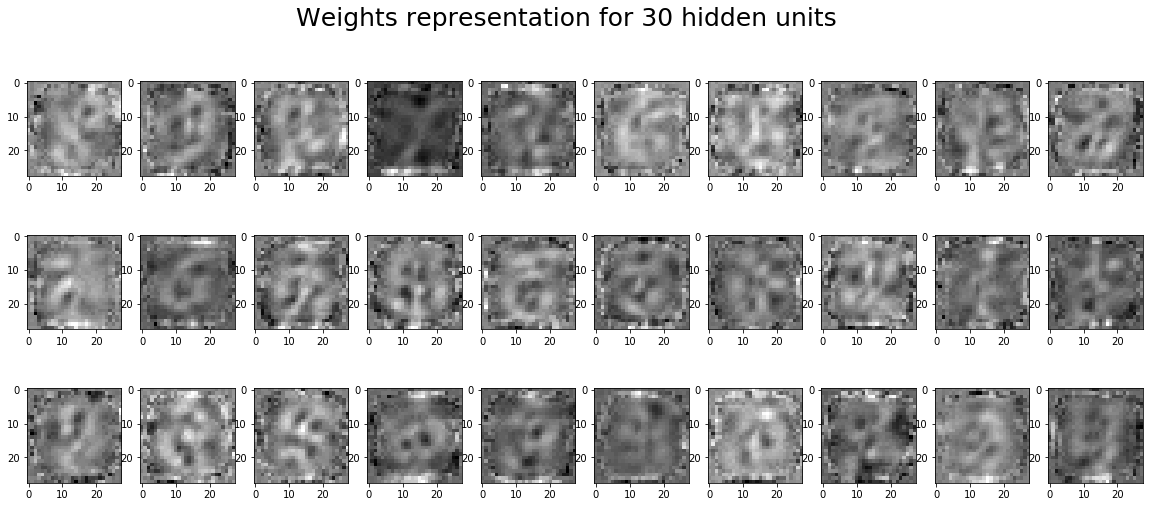

In [15]:
weights = save_for_weights[2].get_weights()
weights = np.array(weights[0])
plt.figure(figsize=(20,8))
for j in range(30):
    col = weights.T[j]
    ax=plt.subplot(3, 10, j+1)
    plt.imshow(col.reshape(28,28))
    plt.suptitle("Weights representation for 30 hidden units", fontsize=25)